# matplotlib・seabornを用いた可視化まとめ

## 準備
***

始める前に。。。  
matplotlibの階層構造がわからなくなったら、下記のリンクを訪れてみましょう。  
[matplotlib Usage Guide](https://matplotlib.org/stable/tutorials/introductory/usage.html)

最初にざっくり階層構造を書いておきます。  
> **Figure** ： グラフを格納する箱、最上層の箱  
> **Axes** ： Figureのひとつ内側の箱、まさにここにグラフを書く  
> **Title** ： グラフタイトル  
> **Line** ： グラフの線  
> **Markers** ： グラフの点  
> **Y axis label** ： Y軸のキャプション  
> **X axis label** ： X軸のキャプション  
> **Legend** ： 凡例  
> **Grid** ： 目盛線  
> **Spines** ： 外側の線  
> **Major tick** ： 目盛間隔  
> **Major tick label** ： 目盛スケール  
> **Minor tick** ： 補助目盛間隔  
> **Minor tick label** ： 補助目盛スケール

グラフを作る前に、必要なライブラリをインポートしておきます。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Line graph(折れ線グラフ)
***

データの準備をします。  
ここでは適当に0~10の乱数を使います。

In [2]:
x_lineGraph = np.arange(10)
y1_lineGraph = x_lineGraph * np.random.rand(10)
y2_lineGraph = x_lineGraph * np.random.rand(10)

データの中身を見てみます。

In [3]:
print('x', '|', ' y1', '|', ' y2')
for i in range(10):
    print(x_lineGraph[i], '|', '{:.1f}'.format(y1_lineGraph[i]), '|', '{:.1f}'.format(y2_lineGraph[i]))

x |  y1 |  y2
0 | 0.0 | 0.0
1 | 0.7 | 0.4
2 | 1.9 | 1.9
3 | 1.8 | 0.5
4 | 1.9 | 1.4
5 | 3.2 | 1.7
6 | 4.7 | 3.8
7 | 2.2 | 1.1
8 | 3.9 | 7.7
9 | 4.2 | 4.3


折れ線グラフで可視化をします。

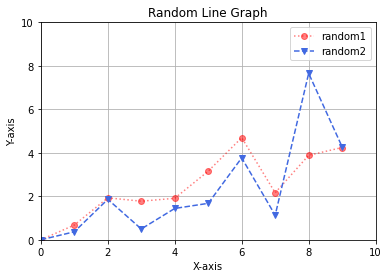

In [4]:
# 1. FigureとAxesを準備
fig_line, ax_line = plt.subplots()

# 2. グラフタイトルを設定
ax_line.set_title("Random Line Graph")

# 3. X軸、y軸キャプションを設定
ax_line.set_xlabel("X-axis")
ax_line.set_ylabel("Y-axis")

# 4. X軸、y軸の範囲を指定
ax_line.set_xlim([0, 10])
ax_line.set_ylim([0, 10])

# 5. 目盛線を表示
ax_line.grid()

# 6. プロット
ax_line.plot(x_lineGraph, y1_lineGraph, label = "random1", color = 'r', ls = ':', marker = 'o', alpha = 0.5)
ax_line.plot(x_lineGraph, y2_lineGraph, label = "random2", color = '#4169e1', ls = '--', marker = 'v')

# 7. 凡例を表示
ax_line.legend()

## 線の色  
グレースケール、RGB、16進数カラーコード、色の頭文字で指定できる。  
```color = 0.5, color = (255, 255, 255), color = '#0f0f0f', color = 'g'```  
[色一覧](https://matplotlib.org/2.0.2/examples/color/named_colors.html)

## 線種  
直感的に指定できる。  
```ls = ':', ls = '-.', ls = '--', ls = '-'```  
[線種一覧](https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html)

## 線の太さ  
```lw = 1.0```のような感じで数字で指定。

## マーカーの種類  
直感的に指定できる。  
```marker = '.', marker = ',', marker = 'o', marker = 'v'```  
[マーカー一覧](https://matplotlib.org/stable/api/markers_api.html)

## マーカーのその他の設定  
#### マーカーのエッジ色  
markeredgecolorで指定。基本的に線の色の指定と同じ。  
```mec = 'r'```  
  
#### マーカーのエッジ幅  
markeredgewidthで指定。  
```mew = '1.0'```  
  
#### マーカーの内部色  
markerfacecolorで指定。基本的に線の色の指定と同じ。  
```mfc = 'b'```  

#### マーカーサイズ  
markersizeで指定。  
```ms = '1.0'```  

## Bar graph(棒グラフ)
***

適当にデータを準備をします。  

In [5]:
x_barGraph = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
n_bar = len(x_barGraph)
y1_barGraph = np.random.randint(1, 10, n_bar)
y2_barGraph = np.random.randint(1, 10, n_bar)

データの中身を見てみます。

In [6]:
print('x', '|', 'y1', '|', 'y2')
for i in range(n_bar):
    print(x_barGraph[i], '|', y1_barGraph[i], '|', y2_barGraph[i])

x | y1 | y2
A | 8 | 6
B | 5 | 2
C | 4 | 8
D | 8 | 9
E | 3 | 2
F | 1 | 2
G | 4 | 2
H | 8 | 8
I | 4 | 3
J | 7 | 3


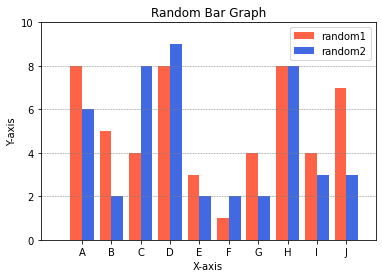

In [10]:
# 1. FigureとAxesを準備
fig_bar, ax_bar = plt.subplots()

# 2. グラフタイトルを設定
ax_bar.set_title("Random Bar Graph")

# 3. X軸、y軸キャプションを設定
ax_bar.set_xlabel("X-axis")
ax_bar.set_ylabel("Y-axis")

# 4. X軸、y軸の範囲を指定
width = 0.4
ax_bar.set_xlim([-1 - width / 2, n_bar + width / 2])
ax_bar.set_ylim([0, 10])

# 5. 目盛線を表示
ax_bar.grid(axis = 'y', color = 'gray', ls = '--', lw = 0.5)

# 6. プロット
ax_bar.bar(np.arange(n) - width / 2, y1_barGraph, label = "random1", color = 'tomato', width = width, tick_label = x_barGraph, align = 'edge')
ax_bar.bar(np.arange(n) + width / 2, y2_barGraph, label = "random2", color = '#4169e1', width = width, tick_label = x_barGraph, align = 'edge')

# 7. 凡例を表示
ax_bar.legend()

## Scatter graph(散布図)
***

適当にデータを準備をします。  

In [14]:
x1_scatterGraph = np.arange(10, 0, -1)
x2_scatterGraph = 10 * np.random.rand(10)
n_scatter = len(x1_scatterGraph)
y1_scatterGraph = np.sqrt(x1_scatterGraph)
y2_scatterGraph = 10 * np.random.rand(10)

データの中身を見てみます。

In [20]:
print('x1', '|', 'y1', '|', 'x2', '|', 'y2')
for i in range(n_scatter):
    print(x1_scatterGraph[i], '|', '{:.1f}'.format(y1_scatterGraph[i]), '|', '{:.1f}'.format(x2_scatterGraph[i]), '|', '{:.1f}'.format(y2_scatterGraph[i]))

x1 | y1 | x2 | y2
10 | 3.2 | 6.1 | 5.8
9 | 3.0 | 9.8 | 6.5
8 | 2.8 | 3.5 | 2.7
7 | 2.6 | 3.2 | 3.3
6 | 2.4 | 9.3 | 5.4
5 | 2.2 | 1.9 | 1.2
4 | 2.0 | 5.0 | 5.4
3 | 1.7 | 7.9 | 6.7
2 | 1.4 | 4.2 | 5.8
1 | 1.0 | 9.4 | 7.5
